In [1]:
print("JAI MATA DI")

JAI MATA DI


In [2]:
#Author Aditya Upadhyay
#Date 2024-10-14
#Purpose : Is baar 10
#Version : 1.0


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [4]:
from PIL import Image
import os
import numpy as np

# Define paths to the train and test directories
train_dir = 'Dataset/Train'
test_dir = 'Dataset/Test'

# Check if the directories exist
if not os.path.exists(train_dir):
    raise FileNotFoundError(f"Training directory {train_dir} not found.")
if not os.path.exists(test_dir):
    raise FileNotFoundError(f"Test directory {test_dir} not found.")

# Function to load images from a directory and its subdirectories
def load_images_from_directory(directory):
    images = {}
    for root, _, files in os.walk(directory):
        class_name = os.path.basename(root)
        images[class_name] = []
        for filename in files:
            if filename.endswith(".jpg") or filename.endswith(".png"):
                img_path = os.path.join(root, filename)
                with Image.open(img_path) as img:
                    img_array = np.array(img)
                    images[class_name].append(img_array)
    return images

# Load images from the train and test directories
train_images = load_images_from_directory(train_dir)
test_images = load_images_from_directory(test_dir)

# Print the number of images loaded for each class
for class_name, images in train_images.items():
    print(f"Loaded {len(images)} images from class {class_name} in {train_dir}")
for class_name, images in test_images.items():
    print(f"Loaded {len(images)} images from class {class_name} in {test_dir}")


Loaded 0 images from class Train in Dataset/Train
Loaded 7215 images from class happy in Dataset/Train
Loaded 4830 images from class sad in Dataset/Train
Loaded 4097 images from class fear in Dataset/Train
Loaded 3171 images from class surprise in Dataset/Train
Loaded 4965 images from class neutral in Dataset/Train
Loaded 3995 images from class angry in Dataset/Train
Loaded 436 images from class disgust in Dataset/Train
Loaded 0 images from class Test in Dataset/Test
Loaded 1774 images from class happy in Dataset/Test
Loaded 1247 images from class sad in Dataset/Test
Loaded 1024 images from class fear in Dataset/Test
Loaded 831 images from class surprise in Dataset/Test
Loaded 1233 images from class neutral in Dataset/Test
Loaded 958 images from class angry in Dataset/Test
Loaded 111 images from class disgust in Dataset/Test


In [5]:
if "Train" in train_images:train_images.pop("Train")
if "Test" in test_images:test_images.pop("Test")

print(train_images.keys())
print(test_images.keys())

dict_keys(['happy', 'sad', 'fear', 'surprise', 'neutral', 'angry', 'disgust'])
dict_keys(['happy', 'sad', 'fear', 'surprise', 'neutral', 'angry', 'disgust'])


Train images:
Class happy: (48, 48)
Class sad: (48, 48)
Class fear: (48, 48)
Class surprise: (48, 48)
Class neutral: (48, 48)
Class angry: (48, 48)
Class disgust: (48, 48)
Test images:
Class happy: (48, 48)
Class sad: (48, 48)
Class fear: (48, 48)
Class surprise: (48, 48)
Class neutral: (48, 48)
Class angry: (48, 48)
Class disgust: (48, 48)
Number of images in each class:
Class happy: 7215
Class sad: 4830
Class fear: 4097
Class surprise: 3171
Class neutral: 4965
Class angry: 3995
Class disgust: 436
Class happy: 1774
Class sad: 1247
Class fear: 1024
Class surprise: 831
Class neutral: 1233
Class angry: 958
Class disgust: 111


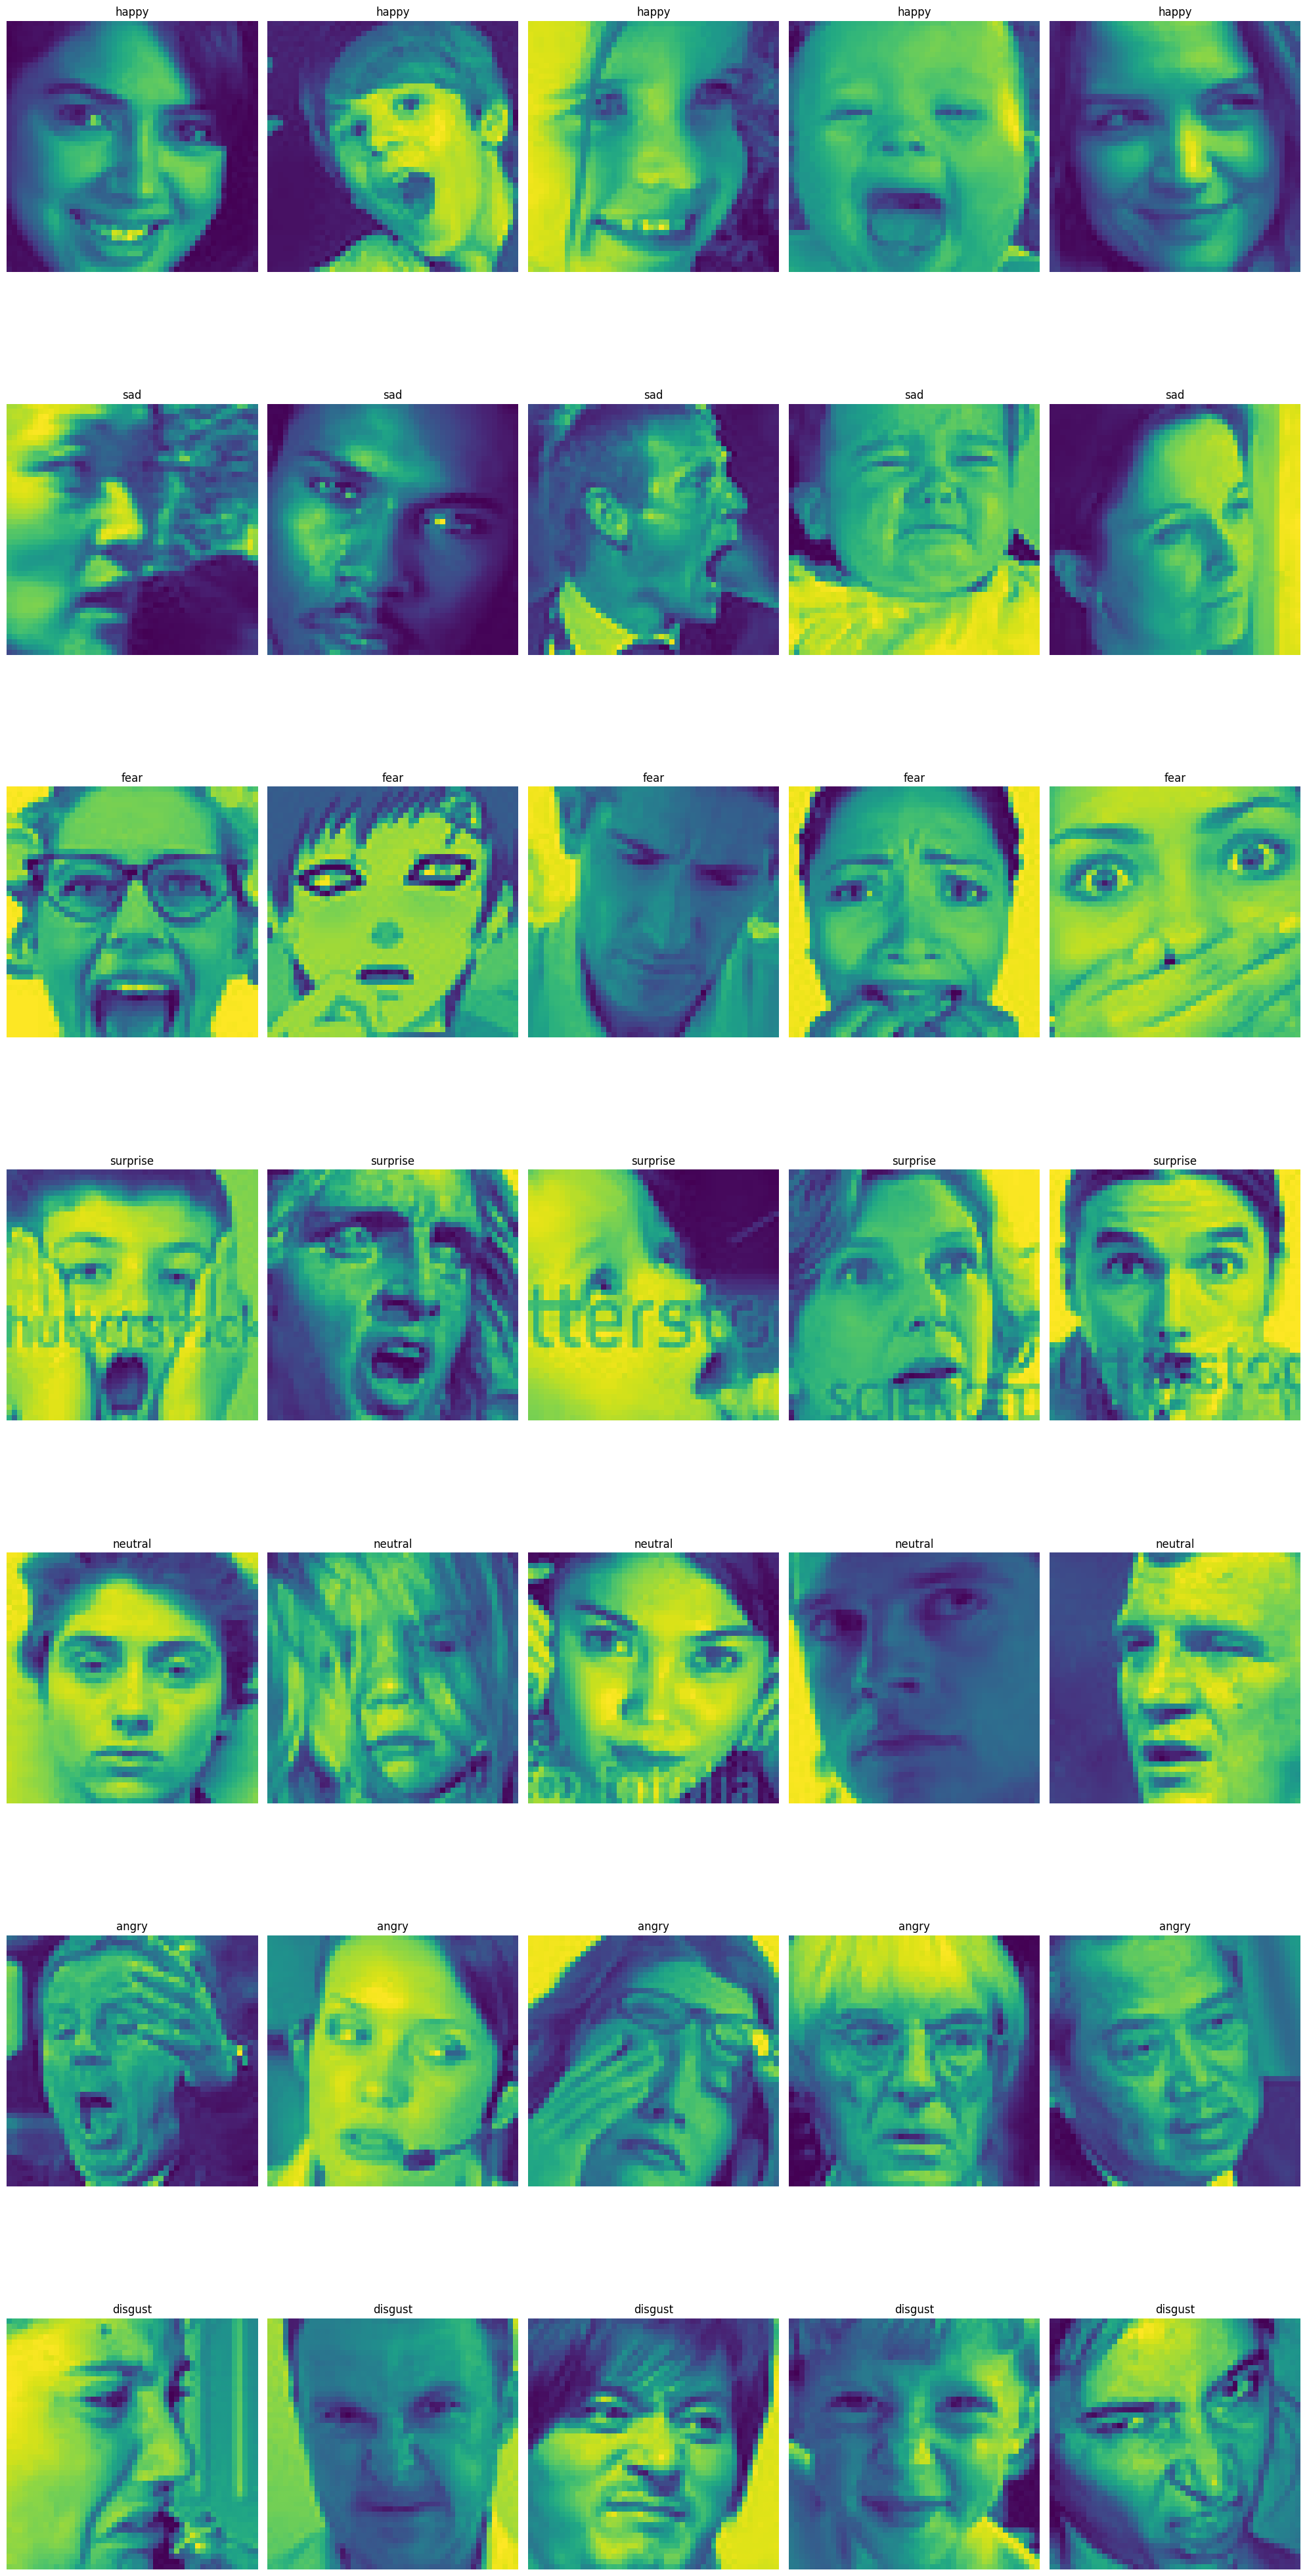

In [6]:
# lets do some EDA like checking the shape of the images etc...

# Check the shape of the images
print("Train images:")
for class_name, images in train_images.items():
    print(f"Class {class_name}: {images[0].shape}")
print("Test images:")
for class_name, images in test_images.items():
    print(f"Class {class_name}: {images[0].shape}")

# Check the number of images in each class
print("Number of images in each class:")
for class_name, images in train_images.items():
    print(f"Class {class_name}: {len(images)}")
for class_name, images in test_images.items():
    print(f"Class {class_name}: {len(images)}")
    
# Determine the number of rows needed based on the number of classes
num_classes = len(test_images)
fig, axes = plt.subplots(nrows=num_classes, ncols=5, figsize=(20, 6 * num_classes))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Plot the first 5 images of each class
index = 0
for class_name, images in test_images.items():
    for j in range(min(5, len(images))):
        axes[index].imshow(images[j])
        axes[index].set_title(class_name)
        axes[index].axis('off')
        index += 1
        
plt.tight_layout()
plt.show()


In [7]:
from PIL import Image, ImageEnhance, ImageOps
import numpy as np
import random

def augment_image(image):
    # Convert numpy array to PIL Image
    pil_image = Image.fromarray(image)

    # Random rotation
    if random.random() > 0.5:
        angle = random.uniform(-30, 30)
        pil_image = pil_image.rotate(angle)

    # Random horizontal flip
    if random.random() > 0.5:
        pil_image = ImageOps.mirror(pil_image)

    # Random vertical flip
    if random.random() > 0.5:
        pil_image = ImageOps.flip(pil_image)

    # Random Gaussian noise
    if random.random() > 0.5:
        np_image = np.array(pil_image)
        mean = 0
        std = random.uniform(0, 25)
        gauss = np.random.normal(mean, std, np_image.shape).astype('uint8')
        np_image = np.clip(np_image + gauss, 0, 255)
        pil_image = Image.fromarray(np_image)

    # Convert PIL Image back to numpy array
    return np.array(pil_image)

# Apply augmentation to all images in the train_images dictionary
augmented_train_images = {}
for class_name, images in train_images.items():
    augmented_train_images[class_name] = [augment_image(image) for image in images]

# Print the number of augmented images for each class
for class_name, images in augmented_train_images.items():
    print(f"Augmented {len(images)} images for class {class_name}")

Augmented 7215 images for class happy
Augmented 4830 images for class sad
Augmented 4097 images for class fear
Augmented 3171 images for class surprise
Augmented 4965 images for class neutral
Augmented 3995 images for class angry
Augmented 436 images for class disgust


In [8]:
# Merge augmented images with original training images
for class_name, images in augmented_train_images.items():
    if class_name in train_images:
        train_images[class_name].extend(images)
    else:
        train_images[class_name] = images



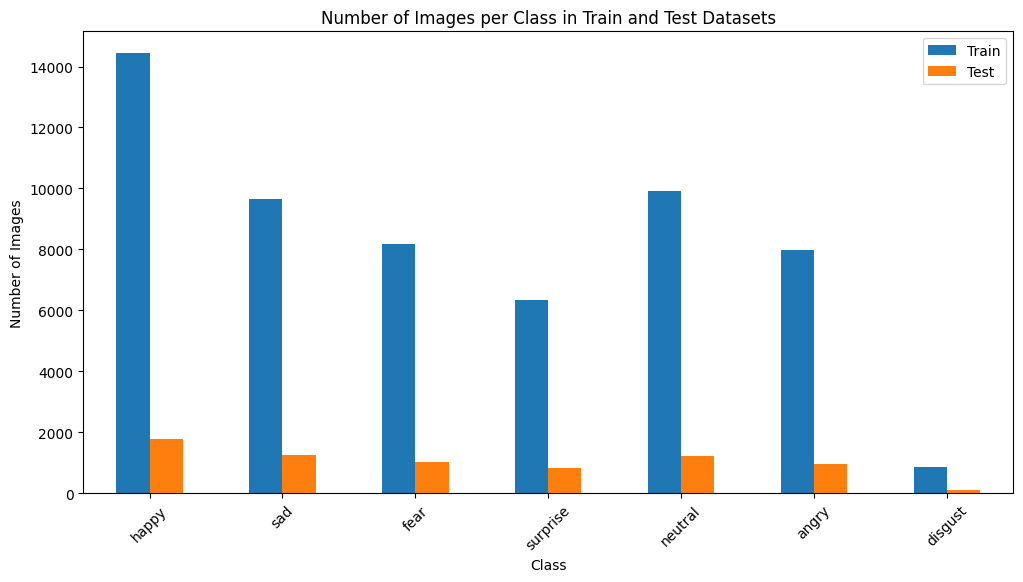

In [9]:
# Count the number of images in each class for train and test datasets
train_counts = {class_name: len(images) for class_name, images in train_images.items()}
test_counts = {class_name: len(images) for class_name, images in test_images.items()}

# Create a DataFrame for easy plotting
counts_df = pd.DataFrame({
    'Class': list(train_counts.keys()),
    'Train': list(train_counts.values()),
    'Test': [test_counts.get(class_name, 0) for class_name in train_counts.keys()]
})

# Plot the histograms
counts_df.plot(x='Class', kind='bar', figsize=(12, 6))
plt.title('Number of Images per Class in Train and Test Datasets')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()

Maximum class size: 14430
Oversampled class happy to 14430 images
Oversampled class sad to 14430 images
Oversampled class fear to 14430 images
Oversampled class surprise to 14430 images
Oversampled class neutral to 14430 images
Oversampled class angry to 14430 images
Oversampled class disgust to 14430 images


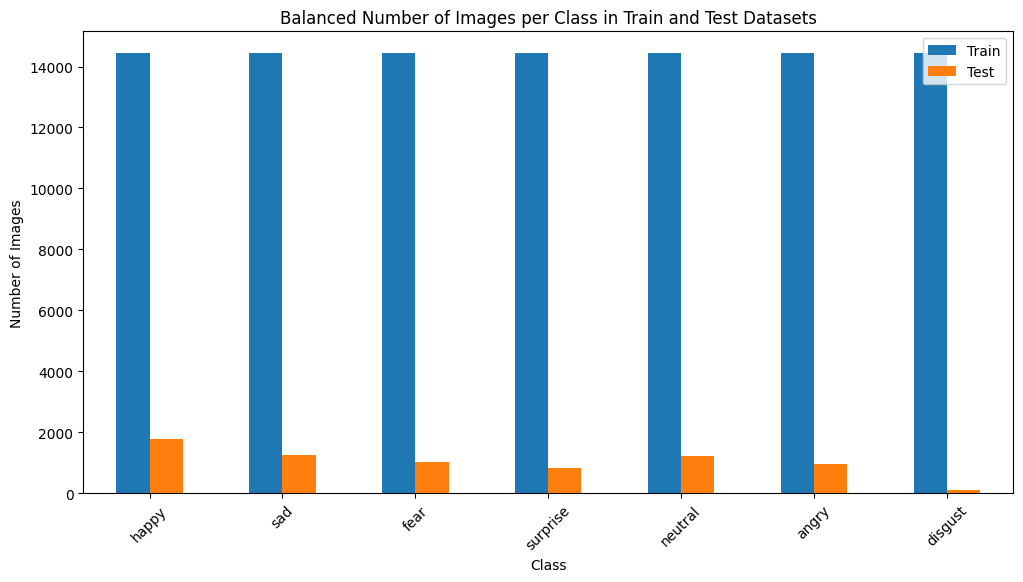

In [10]:
# Step 1: Calculate the target number of images for each class (equal to the maximum class size)
max_class_size = max(train_counts.values())
print(f"Maximum class size: {max_class_size}")

# Step 2: Function to oversample a class by augmenting images
def oversample_class(images, target_size):
    augmented_images = []
    while len(images) + len(augmented_images) < target_size:
        # Augment the images to reach the target size
        image = random.choice(images)  # Randomly pick an image from the class
        augmented_image = augment_image(image)  # Augment the selected image
        augmented_images.append(augmented_image)
    return images + augmented_images

# Step 3: Oversample each class in the train_images dictionary
for class_name, images in train_images.items():
    if len(images) < max_class_size:
        # If the class has fewer images than the max_class_size, oversample it
        train_images[class_name] = oversample_class(images, max_class_size)
    print(f"Oversampled class {class_name} to {len(train_images[class_name])} images")

# Step 4: Recalculate the number of images in each class after oversampling
train_counts = {class_name: len(images) for class_name, images in train_images.items()}

# Create a DataFrame for easy plotting
counts_df_balanced = pd.DataFrame({
    'Class': list(train_counts.keys()),
    'Train': list(train_counts.values()),
    'Test': [test_counts.get(class_name, 0) for class_name in train_counts.keys()]
})

# Plot the new balanced class distribution
counts_df_balanced.plot(x='Class', kind='bar', figsize=(12, 6))
plt.title('Balanced Number of Images per Class in Train and Test Datasets')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()


# USE THE TEST_IMAGES AND THE TRAIN_IMAGES THEY HAVE BEEN BALANCED

In [11]:
# IF WE WANNA BALANCE THE TEST TOOO

# import copy

# # Find the maximum number of images in any class from the test dataset
# max_test_class_size = max(test_counts.values())
# print(f"Maximum test class size: {max_test_class_size}")

# # Step 2: Function to oversample the test dataset classes
# def oversample_test_class(images, target_size):
#     augmented_images = []
#     while len(images) + len(augmented_images) < target_size:
#         # Augment the images to reach the target size
#         image = random.choice(images)  # Randomly pick an image from the class
#         augmented_image = augment_image(image)  # Augment the selected image
#         augmented_images.append(augmented_image)
#     return images + augmented_images

# # Step 3: Create a deep copy of the original test_images and store it in test_images_oversampled
# test_images_oversampled = copy.deepcopy(test_images)

# # Oversample each class in the test_images_oversampled dictionary
# for class_name, images in test_images_oversampled.items():
#     if len(images) < max_test_class_size:
#         # If the class has fewer images than the max_test_class_size, oversample it
#         test_images_oversampled[class_name] = oversample_test_class(images, max_test_class_size)
#     print(f"Oversampled test class {class_name} to {len(test_images_oversampled[class_name])} images")

# # Step 4: Recalculate the number of images in each class after oversampling the test dataset
# test_counts_balanced = {class_name: len(images) for class_name, images in test_images_oversampled.items()}

# # Create a new DataFrame to plot the balanced distribution
# counts_df_balanced = pd.DataFrame({
#     'Class': list(train_counts.keys()),
#     'Train': list(train_counts.values()),
#     'Test': [test_counts_balanced.get(class_name, 0) for class_name in train_counts.keys()]
# })

# # Plot the new balanced class distribution for both train and test sets
# counts_df_balanced.plot(x='Class', kind='bar', figsize=(12, 6))
# plt.title('Balanced Number of Images per Class in Train and Test Datasets')
# plt.xlabel('Class')
# plt.ylabel('Number of Images')
# plt.xticks(rotation=45)
# plt.show()





# SO IN GENERAL WE DON'T OVERSAMPLE THE TEST DATASET, SO WE WON'T BE USING (test_images_oversampled), ONLY THE (test_images)
# DICTIONARY, OTHERWISE YOU CAN UNCOMMENT THIS CODE

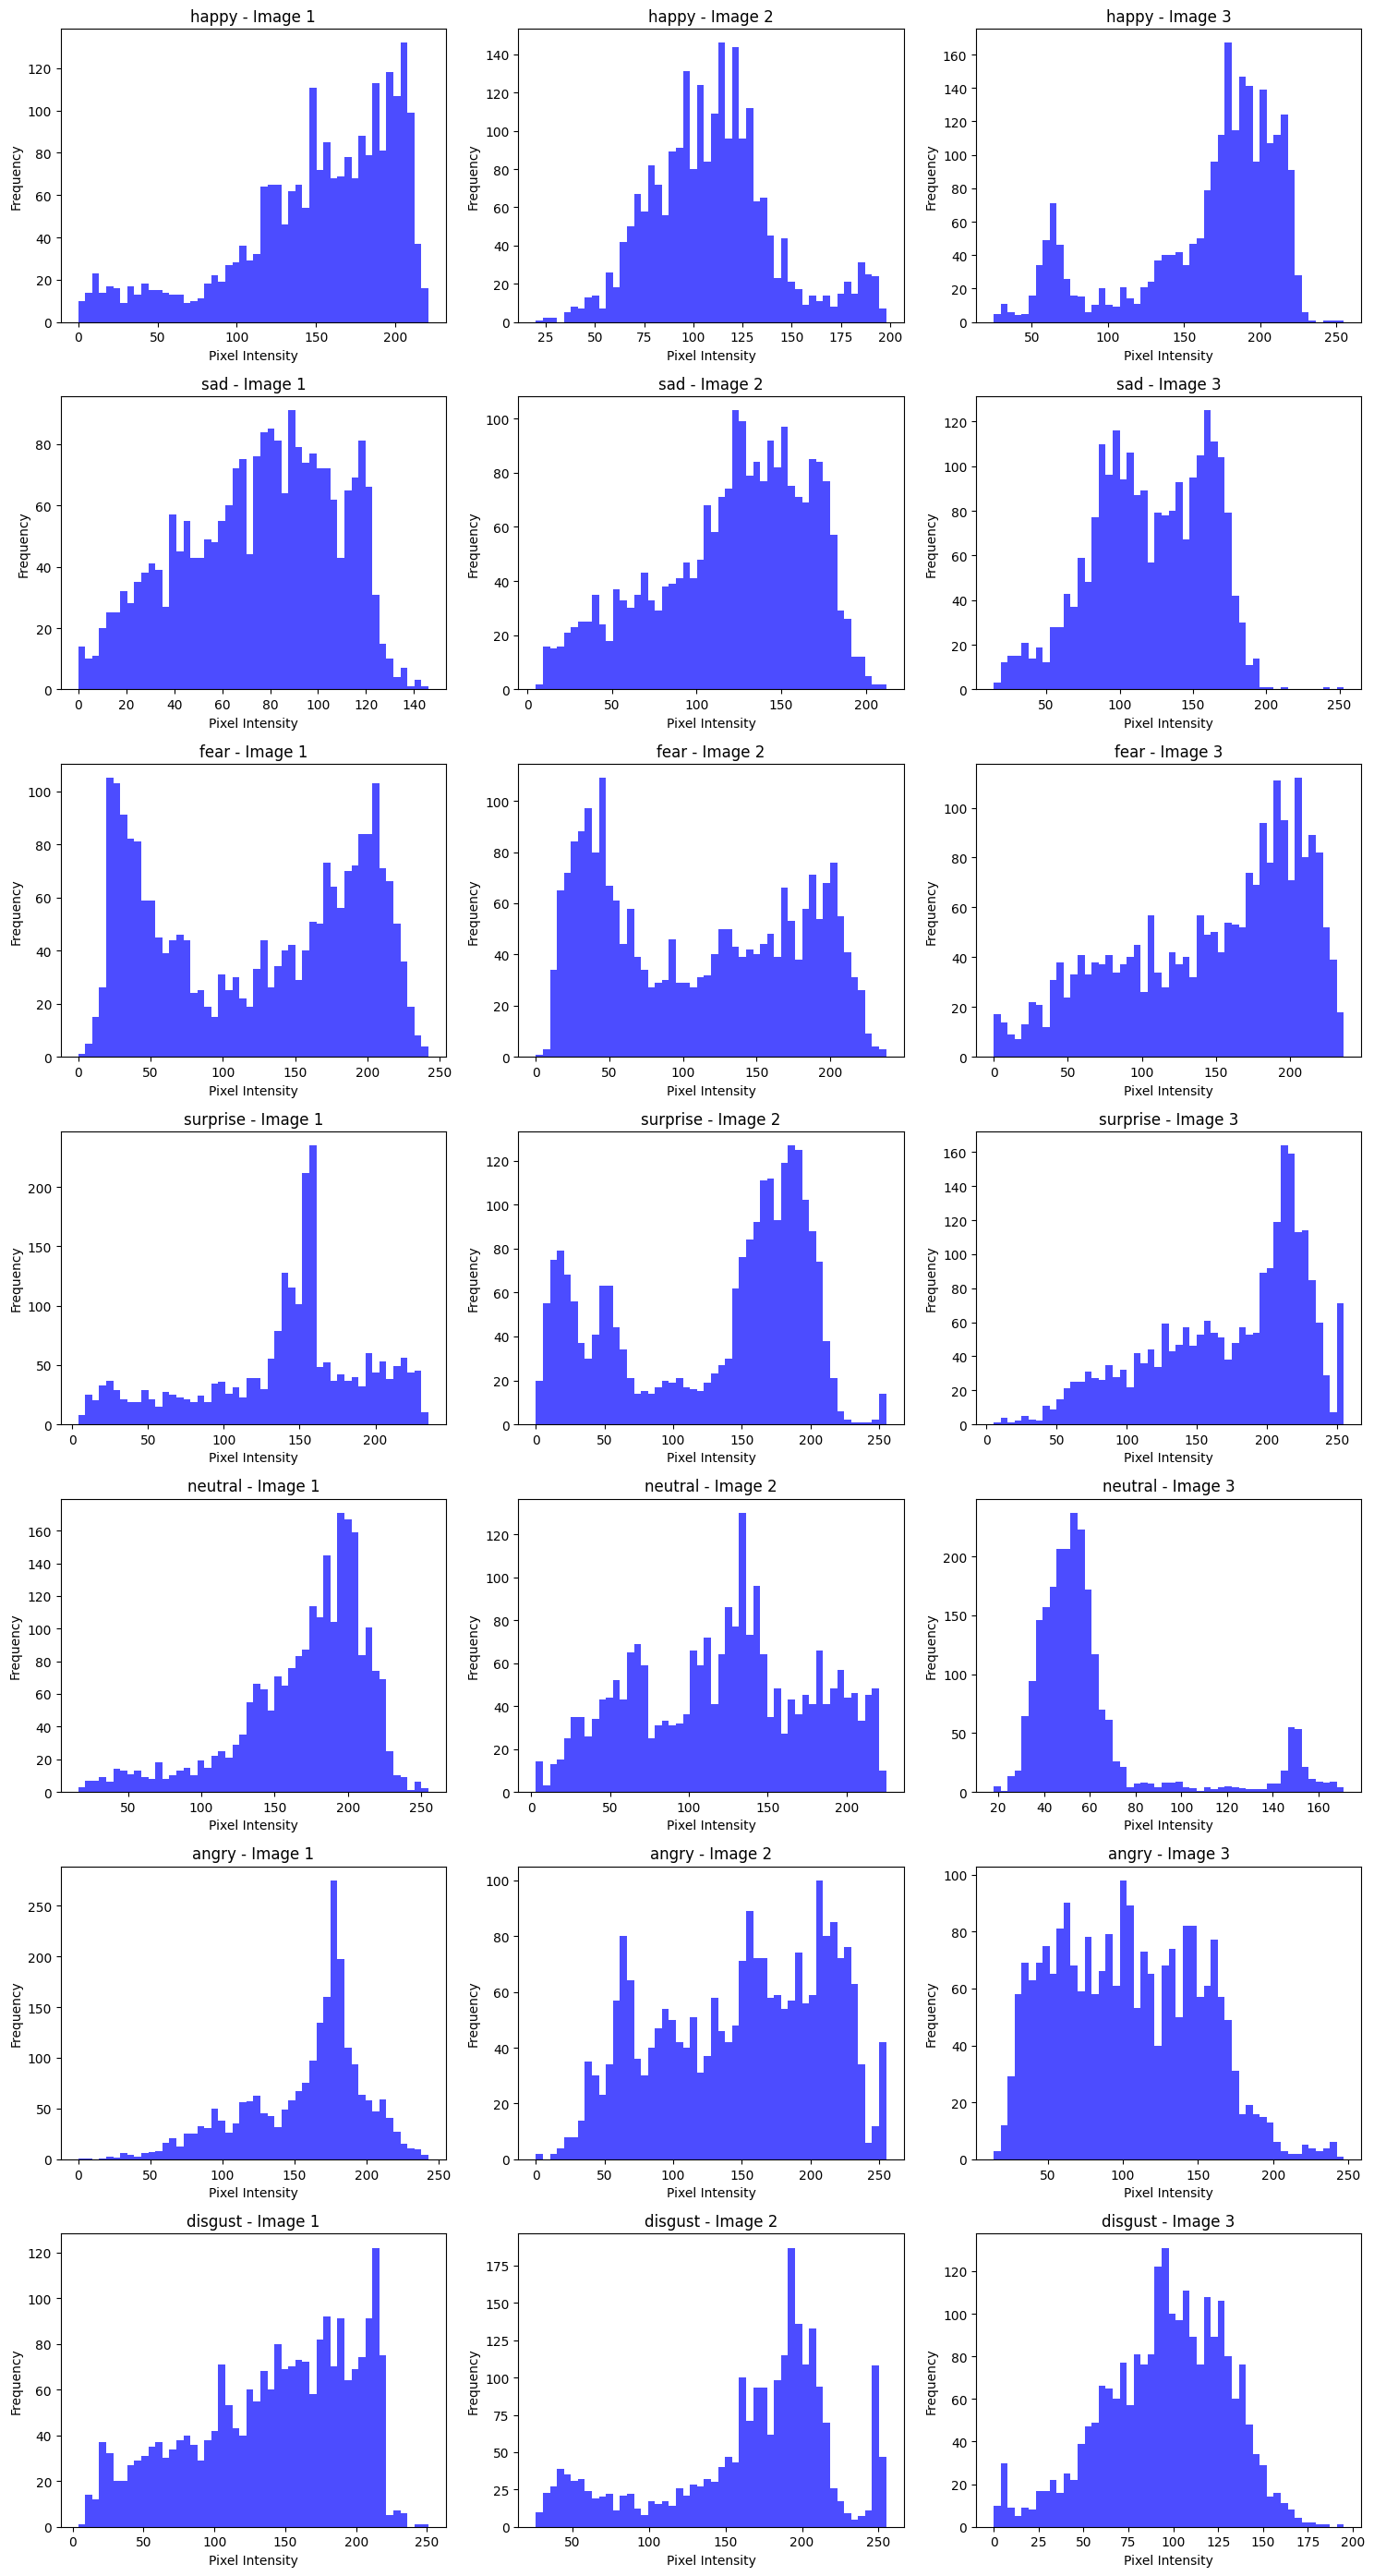

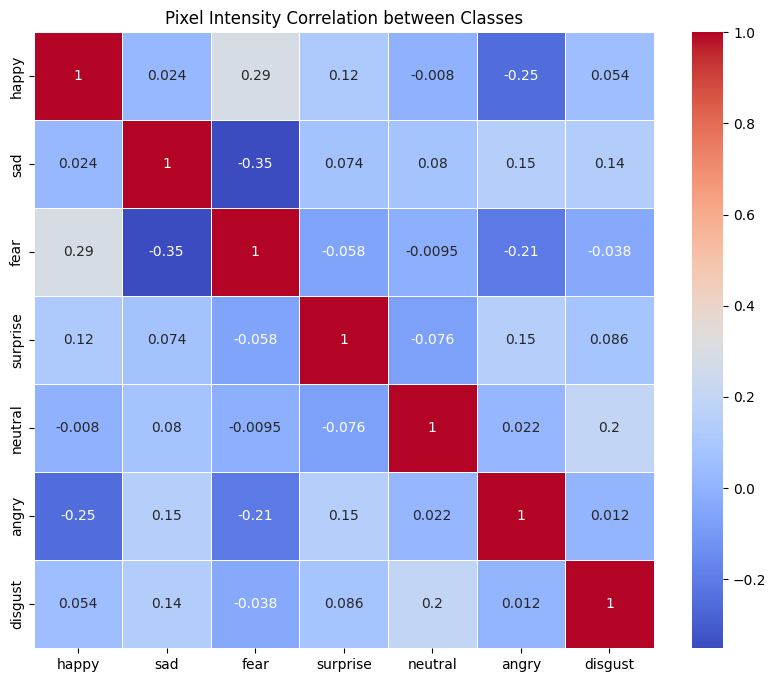

ModuleNotFoundError: No module named 'sklearn'

In [12]:
# -------------------------------------------------------------------------------------------
# Additional Exploratory Data Analysis (EDA)
# -------------------------------------------------------------------------------------------

# 1. Plot Pixel Intensity Distribution for Random Images from Each Class
def plot_pixel_intensity_distribution(images_dict, num_images=3):
    """
    Plot the pixel intensity distribution (histograms) for a few images from each class.
    """
    num_classes = len(images_dict)
    fig, axes = plt.subplots(nrows=num_classes, ncols=num_images, figsize=(15, 4 * num_classes))
    axes = axes.flatten()  # Flatten the axes for easy iteration

    index = 0
    for class_name, images in images_dict.items():
        for i in range(min(num_images, len(images))):
            img = images[i]
            axes[index].hist(img.ravel(), bins=50, color='blue', alpha=0.7)
            axes[index].set_title(f'{class_name} - Image {i+1}')
            axes[index].set_xlabel('Pixel Intensity')
            axes[index].set_ylabel('Frequency')
            index += 1

    plt.tight_layout()
    plt.show()

# Plot pixel intensity distribution for a few images from the train dataset
plot_pixel_intensity_distribution(train_images, num_images=3)


# 2. Compute and Plot the Correlation Heatmap (for pixel intensity correlations)
def plot_correlation_heatmap(images_dict):
    """
    Plot a heatmap of pixel intensity correlations across different classes.
    Takes the first image from each class for this demonstration.
    """
    # Extract the first image from each class and flatten it (grayscale images are already 2D)
    class_images = {class_name: images[0].ravel() for class_name, images in images_dict.items()}
    df = pd.DataFrame(class_images)
    
    # Compute correlation matrix
    corr_matrix = df.corr()

    # Plot heatmap using seaborn
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Pixel Intensity Correlation between Classes')
    plt.show()

# Plot correlation heatmap
plot_correlation_heatmap(train_images)



# 3. Plot Pair Plot (Optimized)
# Reduce the number of images and pixels used for the pair plot to improve performance

from sklearn.decomposition import PCA

def create_flattened_df(images_dict, num_images=10):
    """
    Convert a small subset of the image dictionary into a flattened DataFrame for pair plot visualization.
    Each row will represent the flattened pixel values of an image.
    
    Parameters:
    images_dict : dict : Dictionary containing images grouped by class.
    num_images : int : Number of images to select from each class.
    """
    flattened_data = []
    labels = []

    for class_name, images in images_dict.items():
        # Limit the number of images for the pair plot (e.g., 2-3 images per class)
        selected_images = images[:num_images]
        for img in selected_images:
            flattened_data.append(img.ravel())  # Flatten the image
            labels.append(class_name)  # Assign the class label to each image

    flattened_df = pd.DataFrame(flattened_data)
    flattened_df['Class'] = labels
    return flattened_df

# Create a flattened DataFrame using fewer images (e.g., 3 per class)
flattened_df = create_flattened_df(train_images, num_images=10)

# Perform PCA to reduce the dimensionality of the pixel space
pca = PCA(n_components=2)  # Reduce the data to 2 principal components for easier plotting
flattened_data = flattened_df.drop(columns=['Class'])  # Drop the class labels to apply PCA
reduced_data = pca.fit_transform(flattened_data)

# Create a new DataFrame with reduced PCA data and class labels
reduced_df = pd.DataFrame(reduced_data, columns=['PCA1', 'PCA2'])
reduced_df['Class'] = flattened_df['Class']

# Plot pair plot using reduced PCA features (2D pair plot)
sns.pairplot(reduced_df, hue='Class', diag_kind='hist', plot_kws={'alpha': 0.7})
plt.show()


# PCA on Whole Trian

In [14]:
# on trian do PCA on whole dataset for each class 

# Perform PCA on the entire training dataset to visualize the pixel space

# Step 1: Flatten the images and create
flattened_data = []
labels = []

for class_name, images in train_images.items():
    for img in images:
        flattened_data.append(img.ravel())  # Flatten the image
        labels.append(class_name)  # Assign the class label to each image

flattened_df = pd.DataFrame(flattened_data)
flattened_df['Class'] = labels
print("CHECKPOINT")


KeyboardInterrupt: 

In [ ]:
import cudf
from cuml.decomposition import PCA

# Convert the pandas DataFrame to a cuDF DataFrame
flattened_data_cudf = cudf.DataFrame.from_pandas(flattened_df.drop(columns=['Class']))

# Step 2: Perform PCA to reduce the dimension using GPU
pca_gpu = PCA(n_components=2)  # Reduce the data to 2 principal components for easier plotting
reduced_data_gpu = pca_gpu.fit_transform(flattened_data_cudf)

# Convert the result back to a pandas DataFrame if needed
reduced_data = reduced_data_gpu.to_pandas()
